In [1]:
from mamba_mic.data_modules.camus import CAMUSDataModule
import matplotlib.pyplot as plt

In [2]:
data = CAMUSDataModule(batch_size=1, data_dir="../data/CAMUS/database_nifti", cv_folds=10, fold_index=0)
data.prepare_data()
data.setup()

Training subjects: 900
Test subjects: 100


In [3]:
data.subjects[:2]

[{'image': PosixPath('../data/CAMUS/database_nifti/patient0001/patient0001_2CH_half_sequence.nii.gz'),
  'label': PosixPath('../data/CAMUS/database_nifti/patient0001/patient0001_2CH_half_sequence_gt.nii.gz'),
  'image_meta_dict': {'view': '2CH',
   'patient_id': 'patient0001',
   'ED': '1',
   'ES': '18',
   'NbFrame': '18',
   'Sex': 'F',
   'Age': '56',
   'ImageQuality': 'Good',
   'EF': '54',
   'FrameRate': '48.4'}},
 {'image': PosixPath('../data/CAMUS/database_nifti/patient0001/patient0001_4CH_half_sequence.nii.gz'),
  'label': PosixPath('../data/CAMUS/database_nifti/patient0001/patient0001_4CH_half_sequence_gt.nii.gz'),
  'image_meta_dict': {'view': '4CH',
   'patient_id': 'patient0001',
   'ED': '1',
   'ES': '20',
   'NbFrame': '20',
   'Sex': 'F',
   'Age': '56',
   'ImageQuality': 'Good',
   'EF': '54',
   'FrameRate': '48.4'}}]

In [4]:
print(data.val_set[0][0]["image"].meta)
print(data.val_set[0][0]["image"].shape)
print(data.val_set[0][0]["label"].shape)

{'view': '2CH', 'patient_id': 'patient0490', 'ED': '1', 'ES': '17', 'NbFrame': '17', 'Sex': 'F', 'Age': '76', 'ImageQuality': 'Medium', 'EF': '47', 'FrameRate': '55.4', affine: tensor([ 0.8867,  0.0000,  0.0000, -0.0566], dtype=torch.float64), space: RAS}
torch.Size([1, 512, 512])
torch.Size([4, 512, 512])


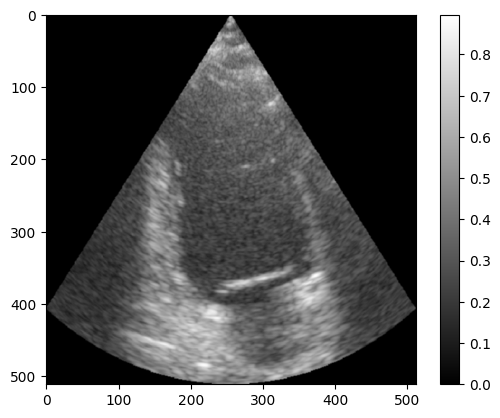

In [5]:
plt.imshow(data.val_set[0][0]["image"][0, :, :], cmap="gray")
plt.colorbar()
plt.show()

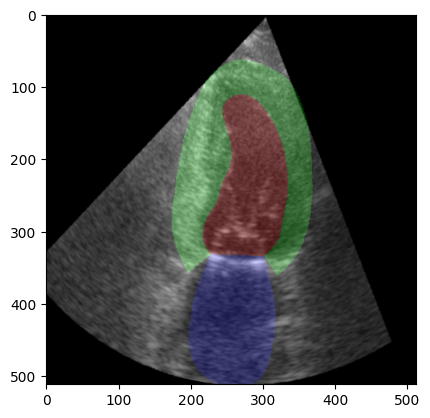

In [7]:
train_sample = data.train_set[10][0]

plt.imshow(train_sample["image"][0, :, :], cmap="gray")
plt.imshow(train_sample["label"][1:].permute(1, 2, 0), alpha=0.2)
plt.show()